In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
from scipy.optimize import curve_fit
from scipy.stats import binned_statistic
import pickle
import yaml
from itertools import chain
import matplotlib.font_manager as font_manager
import json

In [23]:
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif']='Myriad Pro'

plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels

# # set axes and tick width
plt.rc('axes', linewidth=0.5)
mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 0.5
mpl.rcParams['xtick.minor.size'] = 2
mpl.rcParams['xtick.minor.width'] = 0.5
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.major.width'] = 0.5
mpl.rcParams['ytick.minor.size'] = 2
mpl.rcParams['ytick.minor.width'] = 0.5
# # additional parameters
mpl.rcParams['lines.linewidth'] = 0.5

In [3]:
## modify this for the location of napari-mm3 on your computer
helpers_folder = os.path.realpath('/Users/ryan/napari-mm3/src/napari_mm3/')

if helpers_folder not in sys.path:
    sys.path.insert(0, helpers_folder)
    
import utils_plotting as mm3

### Load data

In [4]:
df_otsu = pd.read_csv('20171225_otsu_complete_cells.csv')
df_unet = pd.read_csv('20171225_unet_complete_cells.csv')
df_delta = pd.read_csv('20171225_delta.csv')
df_bac = pd.read_csv('20171225_fs104_bacmman_0223.csv')

### Fig 4.3. Adder correlations

In [5]:
sns.set_palette('Spectral',6,desat=.8)

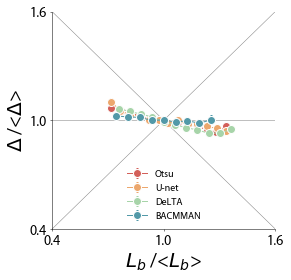

In [14]:
%matplotlib inline
col_otsu = df_otsu['sb']/np.mean(df_otsu['sb'])
row_otsu = df_otsu['delta']/np.mean(df_otsu['delta'])

col_unet = df_unet['sb']/np.mean(df_unet['sb'])
row_unet = df_unet['delta']/np.mean(df_unet['delta'])

col_delta = df_delta['sb']/np.mean(df_delta['sb'])
row_delta = df_delta['delta']/np.mean(df_delta['delta'])

col_bac = df_bac['sb']/np.mean(df_bac['sb'])
row_bac = df_bac['delta']/np.mean(df_bac['delta'])

fig=plt.figure(figsize=(4,4))
ax=plt.axes()

x = np.linspace(0.4,1.6)
y = np.ones(len(x))
ax.plot(x,y,color='gray')
ax.plot(x,2-x,color='gray')
ax.plot(x,x,color='gray')

bin_c, bin_m, bin_e = mm3.binned_stat(col_otsu, row_otsu, bin_edges='sturges', binmin=100)

ax.errorbar(bin_c, bin_m, yerr=bin_e, xerr=None,
              marker='o', ms=8, alpha=1,ls='-',
              lw=1, mew=1, mec='white',mfc='C0', color='C0',
              elinewidth=0.5, capsize=1, capthick=0.5,
              zorder=2, label='Otsu')

bin_c, bin_m, bin_e = mm3.binned_stat(col_unet, row_unet, bin_edges='sturges', binmin=100)

ax.errorbar(bin_c, bin_m, yerr=bin_e, xerr=None,
              marker='o', ms=8, alpha=1, ls='-',
              lw=1, mew=1,mec='white', mfc='C1',color='C1',
              elinewidth=0.5, capsize=1, capthick=0.5,
              zorder=2,label='U-net')

bin_c, bin_m, bin_e = mm3.binned_stat(col_delta, row_delta, bin_edges='sturges', binmin=100)

ax.errorbar(bin_c, bin_m, yerr=bin_e, xerr=None,
              marker='o', ms=8, alpha=1,ls='-',
              lw=1, mew=1, mec='white', mfc='C4', color='C4',
              elinewidth=0.5, capsize=1, capthick=0.5,
              zorder=2,label='DeLTA')

bin_c, bin_m, bin_e = mm3.binned_stat(col_bac, row_bac, bin_edges='sturges', binmin=100)

ax.errorbar(bin_c, bin_m, yerr=bin_e, xerr=None,
              marker='o', ms=8, alpha=1,ls='-',
              lw=1, mew=1, mec='white', mfc='C5', color='C5',
              elinewidth=0.5, capsize=1, capthick=0.5,
              zorder=2,label='BACMMAN')

ax.set_xticks([.4,1,1.6])
ax.set_yticks([.4,1,1.6])
ax.set_xlim(.4,1.6)
ax.set_ylim(.4,1.6)
ax.set_xlabel('$L_b$ /<$L_b$>',fontsize=20)
ax.set_ylabel('$\Delta$ /<$\Delta$>',fontsize=20)
plt.legend(frameon=False)
sns.despine()

In [9]:
def tau_fit(sb,a,b):
    return (a/sb+b)

In [10]:
curve_fit(tau_fit,bin_c,bin_m)

(array([0.55970953, 1.75101805]),
 array([[ 0.0251591 , -0.00995458],
        [-0.00995458,  0.00409328]]))

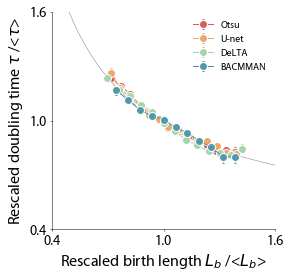

In [13]:
%matplotlib inline
col_otsu = df_otsu['sb']/np.mean(df_otsu['sb'])
row_otsu = df_otsu['tau']/np.mean(df_otsu['tau'])

col_unet = df_unet['sb']/np.mean(df_unet['sb'])
row_unet = df_unet['tau']/np.mean(df_unet['tau'])

col_delta = df_delta['sb']/np.mean(df_delta['sb'])
row_delta = df_delta['tau']/np.mean(df_delta['tau'])

col_bac = df_bac['sb']/np.mean(df_bac['sb'])
row_bac = df_bac['tau']/np.mean(df_bac['tau'])

fig=plt.figure(figsize=(4,4))
ax=plt.axes()

x = np.linspace(0.4,1.6)
y = np.ones(len(x))

fit1 = curve_fit(tau_fit,bin_c,bin_m)[0]

ax.plot(x,tau_fit(x,*fit1),color='gray')


bin_c, bin_m, bin_e = mm3.binned_stat(col_otsu, row_otsu, bin_edges='sturges', binmin=50)

ax.errorbar(bin_c, bin_m, yerr=bin_e, xerr=None,
              marker='o', ms=8, alpha=1,ls='-',
              lw=1, mew=1, mec='white',mfc='C0', color='C0',
              elinewidth=0.5, capsize=1, capthick=0.5,
              zorder=2, label='Otsu')


bin_c, bin_m, bin_e = mm3.binned_stat(col_unet, row_unet, bin_edges='sturges', binmin=50)

ax.errorbar(bin_c, bin_m, yerr=bin_e, xerr=None,
              marker='o', ms=8, alpha=1, ls='-',
              lw=1, mew=1,mec='white', mfc='C1',color='C1',
              elinewidth=0.5, capsize=1, capthick=0.5,
              zorder=2,label='U-net')


bin_c, bin_m, bin_e = mm3.binned_stat(col_delta, row_delta, bin_edges='sturges', binmin=50)

ax.errorbar(bin_c, bin_m, yerr=bin_e, xerr=None,
              marker='o', ms=8, alpha=1,ls='-',
              lw=1, mew=1, mec='white', mfc='C4', color='C4',
              elinewidth=0.5, capsize=1, capthick=0.5,
              zorder=2,label='DeLTA')

bin_c, bin_m, bin_e = mm3.binned_stat(col_bac, row_bac, bin_edges='sturges', binmin=50)

ax.errorbar(bin_c, bin_m, yerr=bin_e, xerr=None,
              marker='o', ms=8, alpha=1,ls='-',
              lw=1, mew=1, mec='white', mfc='C5', color='C5',
              elinewidth=0.5, capsize=1, capthick=0.5,
              zorder=2,label='BACMMAN')

ax.set_xticks([.4,1,1.6])
ax.set_yticks([.4,1,1.6])
ax.set_xlim(.4,1.6)
ax.set_ylim(.4,1.6)
ax.set_xlabel('Rescaled birth length $L_b$ /<$L_b$>',fontsize=16)
ax.set_ylabel('Rescaled doubling time $\\tau$ /<$\\tau$>',fontsize=16)
sns.despine()
plt.legend(frameon=False)

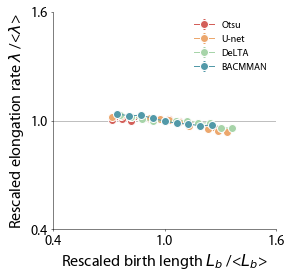

In [16]:
col_otsu = df_otsu['sb']/np.mean(df_otsu['sb'])
row_otsu = df_otsu['elong_rate']/np.mean(df_otsu['elong_rate'])

col_unet = df_unet['sb']/np.mean(df_unet['sb'])
row_unet = df_unet['elong_rate']/np.mean(df_unet['elong_rate'])

col_delta = df_delta['sb']/np.mean(df_delta['sb'])
row_delta = df_delta['elong_rate']/np.mean(df_delta['elong_rate'])

col_bac = df_bac['sb']/np.mean(df_bac['sb'])
row_bac = df_bac['elong_rate']/np.mean(df_bac['elong_rate'])

fig=plt.figure(figsize=(4,4))
ax=plt.axes()

x = np.linspace(0.4,1.6)
y = np.ones(len(x))
ax.plot(x,y,color='gray')

bin_c, bin_m, bin_e = mm3.binned_stat(col_otsu, row_otsu, bin_edges='sturges', binmin=100)

ax.errorbar(bin_c, bin_m, yerr=bin_e, xerr=None,
              marker='o', ms=8, alpha=1,ls='-',
              lw=1, mew=1, mec='white',mfc='C0', color='C0',
              elinewidth=0.5, capsize=1, capthick=0.5,
              zorder=2, label='Otsu')

bin_c, bin_m, bin_e = mm3.binned_stat(col_unet, row_unet, bin_edges='sturges', binmin=100)

ax.errorbar(bin_c, bin_m, yerr=bin_e, xerr=None,
              marker='o', ms=8, alpha=1, ls='-',
              lw=1, mew=1,mec='white', mfc='C1',color='C1',
              elinewidth=0.5, capsize=1, capthick=0.5,
              zorder=2,label='U-net')

bin_c, bin_m, bin_e = mm3.binned_stat(col_delta, row_delta, bin_edges='sturges', binmin=100)

ax.errorbar(bin_c, bin_m, yerr=bin_e, xerr=None,
              marker='o', ms=8, alpha=1,ls='-',
              lw=1, mew=1, mec='white', mfc='C4', color='C4',
              elinewidth=0.5, capsize=1, capthick=0.5,
              zorder=2,label='DeLTA')

bin_c, bin_m, bin_e = mm3.binned_stat(col_bac, row_bac, bin_edges='sturges', binmin=100)

ax.errorbar(bin_c, bin_m, yerr=bin_e, xerr=None,
              marker='o', ms=8, alpha=1,ls='-',
              lw=1, mew=1, mec='white', mfc='C5', color='C5',
              elinewidth=0.5, capsize=1, capthick=0.5,
              zorder=2,label='BACMMAN')

ax.set_xticks([.4,1,1.6])
ax.set_yticks([.4,1,1.6])
ax.set_xlim(.4,1.6)
ax.set_ylim(.4,1.6)
ax.set_xlabel('Rescaled birth length $L_b$ /<$L_b$>',fontsize=16)
ax.set_ylabel('Rescaled elongation rate $\lambda$ /<$\lambda$>',fontsize=16)
sns.despine()
plt.legend(frameon=False)

### Fig 4.4. Parameter distributions

In [17]:
def make_line_hist(data,bins=None,density=True):
    if bins is None:
        bin_vals, bin_edges = np.histogram(data,density=density)
    else:
        bin_vals, bin_edges = np.histogram(data,density=density,bins=bins)
    bin_steps = np.diff(bin_edges)/2.0
    bin_centers = bin_edges[:-1] + bin_steps
    # add zeros to the next points outside this so plot line always goes down
    bin_centers = np.insert(bin_centers, 0, bin_centers[0] - bin_steps[0])
    bin_centers = np.append(bin_centers, bin_centers[-1] + bin_steps[-1])
    bin_vals = np.insert(bin_vals, 0, 0)
    bin_vals = np.append(bin_vals, 0)
    return(bin_centers,bin_vals)

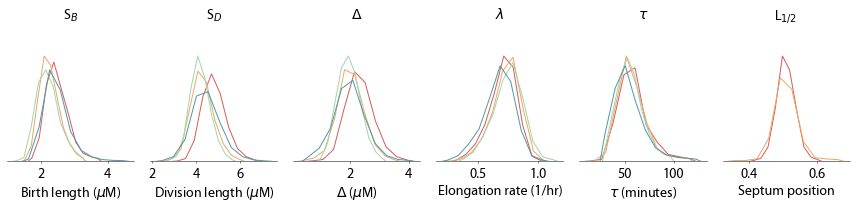

In [20]:
fig, axes = plt.subplots(1,6,figsize=(12,3))
ax = np.ravel(axes)

labels = ['Birth length ($\mu$M)','Division length ($\mu$M)','$\Delta$ ($\mu$M)','Elongation rate (1/hr)',
         '$\\tau$ (minutes)','Septum position']

titles = ['S$_{B}$','S$_{D}$','$\Delta$','$\lambda$','$\\tau$','L$_{1/2}$']

float_columns = ['sb', 'sd', 'delta', 'elong_rate', 'tau', 'septum_position']

for i,c in enumerate(float_columns):
    mu1 = df_otsu[c].mean()
    mu2 = df_unet[c].mean()
    try:
        mu3 = df_delta[c].mean()
        cv3 = df_delta[c].std()/df_delta[c].mean()
        mu4 = df_bac[c].mean()
        cv4 = df_bac[c].std()/df_bac[c].mean()
    except:
        pass
    
    cv1 = df_otsu[c].std()/df_otsu[c].mean()
    cv2 = df_unet[c].std()/df_unet[c].mean()

    ax[i].set_title(titles[i],fontsize=14)
    b1, v1 = make_line_hist(df_otsu[c],density=True)
    ax[i].plot(b1,v1, ls='-',color='C0',
               label='$\mu$ = {:2.2f}\nCV = {:2.2f}'.format(mu1,cv1)
               ,lw=1)
    b2, v2 = make_line_hist(df_unet[c],density=True)
    ax[i].plot(b2,v2, ls='-',color='C1',
               label='$\mu$ = {:2.2f}\nCV = {:2.2f}'.format(mu2,cv2),
               lw=1)
    
    try:
        b3, v3 = make_line_hist(df_delta[c],density=True)
        ax[i].plot(b3,v3, ls='-',color='C4',
               label='$\mu$ = {:2.2f}\nCV = {:2.2f}'.format(mu3,cv3),
               lw=1)
        
        b4, v4 = make_line_hist(df_bac[c],density=True)
        ax[i].plot(b4,v4, ls='-',color='C5',
               label='$\mu$ = {:2.2f}\nCV = {:2.2f}'.format(mu4,cv4),
               lw=1)
    except:
        pass
    
    y_upper = np.max(np.maximum(np.maximum(v3,np.maximum(v1,v2)),v4))
    
    ax[i].set_xlabel(labels[i],fontsize=14)
    ax[i].set_ylim(0,y_upper*1.3)
    ax[i].set_yticks([])
#     ax[i].legend(frameon=False,fontsize=10,loc=1)

sns.despine(left=True)
plt.tight_layout()


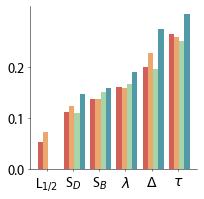

In [25]:
# sns.set_palette('deep')
fig=plt.figure(figsize=(3,3))
ax=plt.axes()
order = [5,1,0,3,2,4]
order_delta = [1,0,3,2,4]
plt.bar(range(6),np.array(cvs_otsu)[order],width=.2,color='C0')
plt.bar(np.arange(6)+0.2,np.array(cvs_unet)[order],width=.2,color='C1')
plt.bar(np.arange(1,6)+0.4,np.array(cvs_delta)[order_delta],width=.2,color='C4')
plt.bar(np.arange(1,6)+0.6,np.array(cvs_bac)[order_delta],width=.2,color='C5')

ax.set_yticks([0,.1,.2])
ax.set_xticks([])
labels = ['L$_{1/2}$','S$_{D}$','S$_{B}$','$\lambda$','$\Delta$','$\\tau$']
ax.set_xticks(np.arange(6)+0.25,labels,fontsize=14)
sns.despine()